## Classification and Regression Tasks:

## Baseline Model: Predicting Views for Gaming Videos 🎮

In this section, we build a baseline regression model to predict the number of views a gaming video receives based on features such as likes, comment count, and video duration.

This baseline model helps us understand the simplest performance we can expect. More advanced models will later be compared against it.



In [3]:
!pip install isodate
import pandas as pd
import isodate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("preprocessed_gaming_data.csv")


###Convert Duration from ISO 8601 to Minutes

The video duration is originally in ISO 8601 format, which is not ideal for numerical analysis. We convert it into total minutes using the `isodate` library.


In [4]:

def convert_iso_duration(duration):
    return isodate.parse_duration(duration.upper()).total_seconds() / 60

df["duration_minutes"] = df["duration"].apply(convert_iso_duration)



###  Split Data into Training and Testing Sets and Train a Linear Regression Model

We use 80% of the data for training and reserve 20% for testing. This allows us to evaluate how well the model generalizes to unseen data. We use `LinearRegression` from scikit-learn to create a basic regression model that fits a line to the data.


In [5]:

features = ["likes", "comment_count", "duration_minutes"]
target = "views"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Baseline Model Performance:")
print(f"• Mean Squared Error (MSE): {mse:.5f}")
print(f"• R² Score: {r2:.5f}")

✅ Baseline Model Performance:
• Mean Squared Error (MSE): 0.00104
• R² Score: 0.55231


### Make Predictions on Test Set and Evaluate the Model

Once the model is trained, we use it to predict the number of views on the testing data. We assess the model using:
- Mean Squared Error (MSE): measures the average squared difference between predicted and actual values.
- R² Score: indicates how much of the variance in the data is explained by the model (1 = perfect prediction, 0 = worst).

These metrics serve as our baseline. We aim to improve upon them in future models.


In [6]:


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Baseline Model Performance:")
print(f"• Mean Squared Error (MSE): {mse:.5f}")
print(f"• R² Score: {r2:.5f}")

✅ Baseline Model Performance:
• Mean Squared Error (MSE): 0.00104
• R² Score: 0.55231


Now we will Develop two additional models using different algorithms or configurations.

# Model 1: Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"✅ Random Forest Model Performance:")
print(f"• Mean Squared Error (MSE): {rf_mse:.5f}")
print(f"• R² Score: {rf_r2:.5f}")

✅ Random Forest Model Performance:
• Mean Squared Error (MSE): 0.00132
• R² Score: 0.43492


# Model 2: XGBoost Regressor

In [8]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_xgb_pred)
xgb_r2 = r2_score(y_test, y_xgb_pred)

print(f"✅ XGBoost Model Performance:")
print(f"• Mean Squared Error (MSE): {xgb_mse:.5f}")
print(f"• R² Score: {xgb_r2:.5f}")

✅ XGBoost Model Performance:
• Mean Squared Error (MSE): 0.00213
• R² Score: 0.08736


The Random Forest and XGBoost models did not outperform the baseline Linear Regression model. The Random Forest model had a higher MSE (0.00132 vs. 0.00104) and a lower R² score (0.43492 vs. 0.55231), indicating it captured less variance in the data. Similarly, the XGBoost model performed poorly with a higher MSE (0.00213) and a much lower R² score (0.08736), suggesting underperformance. This could be due to the need for better feature engineering, hyperparameter tuning, or potentially trying different models for improved results.

# Select the Best-Performing Model for Prediction

In this step, we compare the performance of three models: Linear Regression, Random Forest, and XGBoost using MSE and R² score.

In [9]:
# Compare model performances
print("\n Model Performance Comparison:")
print(f"1. Linear Regression → MSE: {mse:.5f}, R²: {r2:.5f}")
print(f"2. Random Forest     → MSE: {rf_mse:.5f}, R²: {rf_r2:.5f}")
print(f"3. XGBoost           → MSE: {xgb_mse:.5f}, R²: {xgb_r2:.5f}")

# Select the best model based on R²
models = [
    ("Linear Regression", r2),
    ("Random Forest", rf_r2),
    ("XGBoost", xgb_r2)
]

best_model = max(models, key=lambda x: x[1])

print(f"\n Best Performing Model: {best_model[0]} with R² = {best_model[1]:.5f}")



 Model Performance Comparison:
1. Linear Regression → MSE: 0.00104, R²: 0.55231
2. Random Forest     → MSE: 0.00132, R²: 0.43492
3. XGBoost           → MSE: 0.00213, R²: 0.08736

 Best Performing Model: Linear Regression with R² = 0.55231


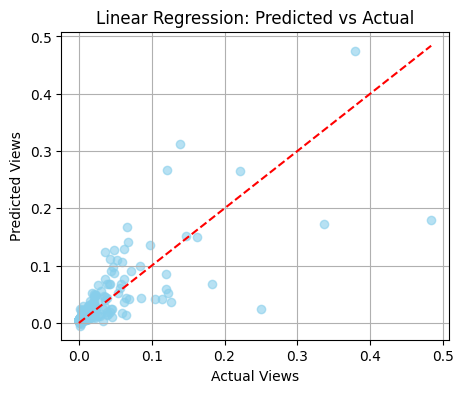

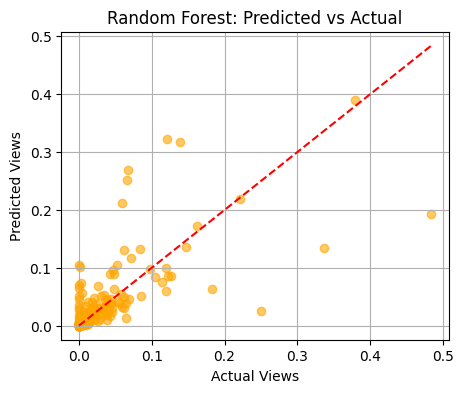

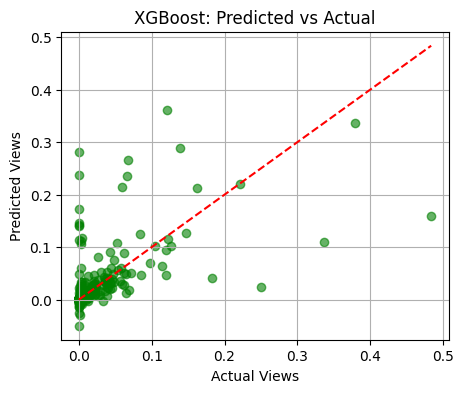

In [10]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)         # Linear Regression
rf_pred = rf_model.predict(X_test)     # Random Forest
xgb_pred = xgb_model.predict(X_test)   # XGBoost

# 1. Linear Regression
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.grid(True)
plt.show()

# 2. Random Forest
plt.figure(figsize=(5, 4))
plt.scatter(y_test, rf_pred, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.grid(True)
plt.show()

# 3. XGBoost
plt.figure(figsize=(5, 4))
plt.scatter(y_test, xgb_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XGBoost: Predicted vs Actual")
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.grid(True)
plt.show()



**Result:**

Linear Regression gave the best performance with the lowest MSE and highest R².

It is selected as the final model for prediction.

### Clustering Tasks:

in this part of our modeling, we used clustering to explore whether gaming videos can be grouped into distinct types based on their engagement and metadata.

We selected K-Means clustering as our primary algorithm, which requires us to decide how many groups (k) to look for. To find the best number of clusters, we used two techniques:

The Elbow Method: helps identify when adding more clusters stops improving performance.

The Silhouette Score: measures how well each point fits within its assigned cluster.

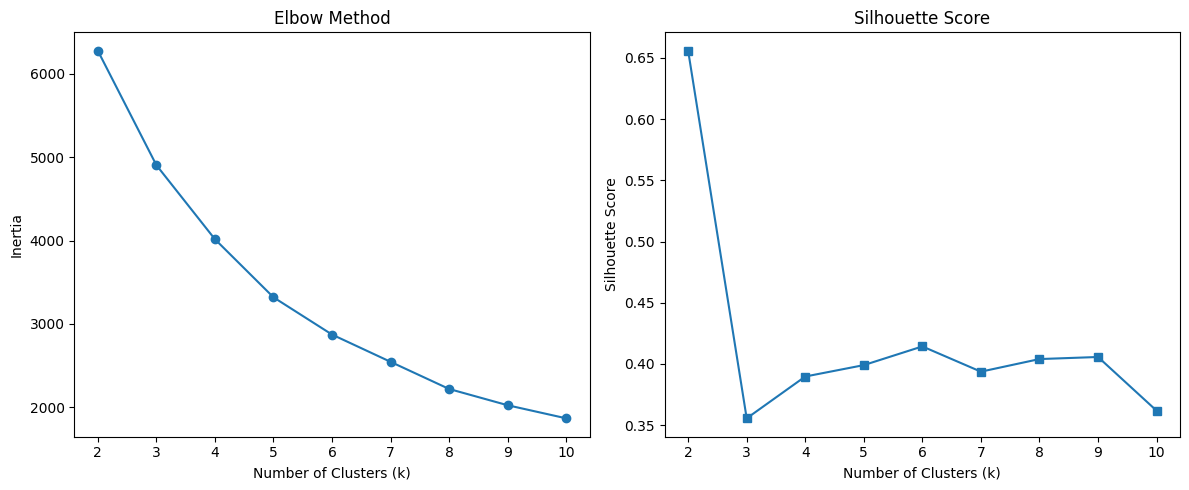

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


# Convert duration from ISO format to seconds
def parse_duration(duration_str):
    match = re.match(r'pt(?:(\d+)m)?(?:(\d+)s)?', duration_str.lower())
    if not match:
        return 0
    minutes = int(match.group(1)) if match.group(1) else 0
    seconds = int(match.group(2)) if match.group(2) else 0
    return minutes * 60 + seconds

df['duration_sec'] = df['duration'].apply(parse_duration)
df['tag_count'] = df['tags'].apply(lambda x: 0 if x == 'no_tags' else len(eval(x)))

# Select features
features = df[['views', 'likes', 'comment_count', 'duration_sec', 'tag_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Try k from 2 to 10
inertia = []
silhouette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

# Plot elbow and silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='s')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()


From the Elbow Method, we observed that the inertia drops sharply at the beginning, but the improvement starts to flatten after k = 4 or 5. This elbow in the curve indicates the point beyond which adding more clusters yields minimal improvement suggesting that k = 4 or 5 offers a good trade-off between model simplicity and cluster quality.

On the other hand, the Silhouette Score is highest at k = 2, but this value is likely too broad and overly simplistic for our dataset. After a drop at k = 3, the scores begin to stabilize between k = 4 and k = 6, indicating a balance between intra-cluster cohesion and inter-cluster separation.

 By analyzing both plots together, we concluded that k = 4 provides the best balance:

It captures meaningful differences between video types.

It avoids overfitting or excessive splitting.

It is supported by both a noticeable elbow and stable silhouette performance.

Therefore, we selected 4 clusters for our final model.

### the optimal number k=4

In [12]:
from sklearn.cluster import KMeans

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Display the average values in each cluster
cluster_summary = df.groupby('cluster_kmeans')[['views', 'likes', 'comment_count', 'duration_sec', 'tag_count']].mean()
print(cluster_summary)


                   views     likes  comment_count  duration_sec  tag_count
cluster_kmeans                                                            
0               0.009498  0.007714       0.021311   1983.883041  29.619883
1               0.016624  0.019989       0.014486    403.341317  10.342515
2               0.248166  0.316624       0.132118    111.317647  24.705882
3               0.007949  0.012116       0.018103    370.207110  60.664606


This clustering revealed 4 distinct behaviors among gaming videos:

Viral short content dominates visibility (Cluster 2),

Overuse of tags doesn’t improve performance (Cluster 3),

Longer videos tend to underperform unless already established (Cluster 0),

Moderate videos have a balance but aren’t highly viral (Cluster 1).

In [20]:
from sklearn.cluster import AgglomerativeClustering
# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
labels_hierarchical = hierarchical.fit_predict(X_scaled)
from sklearn.metrics import silhouette_score

silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical:.4f}")


print(f"KMeans Silhouette Score: {silhouette_kmeans:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}" if silhouette_dbscan != -1 else "DBSCAN not valid")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical:.4f}")

# Pick the best
scores = {
    'kmeans': silhouette_kmeans,
    'dbscan': silhouette_dbscan if silhouette_dbscan != -1 else -999,
    'hierarchical': silhouette_hierarchical
}

best_method = max(scores, key=scores.get)

if best_method == 'kmeans':
    df['best_cluster'] = df['cluster_kmeans']
elif best_method == 'dbscan':
    df['best_cluster'] = labels_dbscan
else:
    df['best_cluster'] = labels_hierarchical

print(f"Best clustering method: {best_method.title()}")


Hierarchical Silhouette Score: 0.3682
KMeans Silhouette Score: 0.3897
DBSCAN not valid
Hierarchical Silhouette Score: 0.3682
Best clustering method: Kmeans


In this analysis, we applied and compared three different clustering algorithms—KMeans, DBSCAN, and Hierarchical Clustering, To evaluate the quality of the clusters produced by each algorithm, we used the Silhouette Score, a metric that assesses how similar an object is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined and more meaningful clusters. **KMeans clustering achieved the highest silhouette score of 0.3897**, while Hierarchical Clustering followed closely with a score of 0.3682. DBSCAN failed to produce a valid clustering structure, as it identified fewer than two clusters, making the silhouette score invalid in that case.

Based on these results, **KMeans** was determined to be the most effective clustering method for this dataset. Its superior silhouette score suggests that it generated the most cohesive and well-separated clusters. Consequently,